In [1]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  MinMaxScaler
from category_encoders import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from customalgorithmforRegnClass import ANN, one_hot_encode, KNNclassifier, accuracy, sigmoid
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline  import make_pipeline

# Prepare DataKNNclassifier

## Import

In [2]:
df2=pd.read_csv('./archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1=pd.read_csv('Churn_Modelling - Churn_Modelling.csv')


## Explore

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
def MinMaxScaler2(X):
    result=((X-X.min())/(X.max()-X.min()))
    return result

In [5]:
df1['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [6]:
# the data is imbalanced

In [7]:
#df1["country_iso3"] = cc.convert(df1['Geography'], to='ISO3')


In [8]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# drop irrelevant columns
df1.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


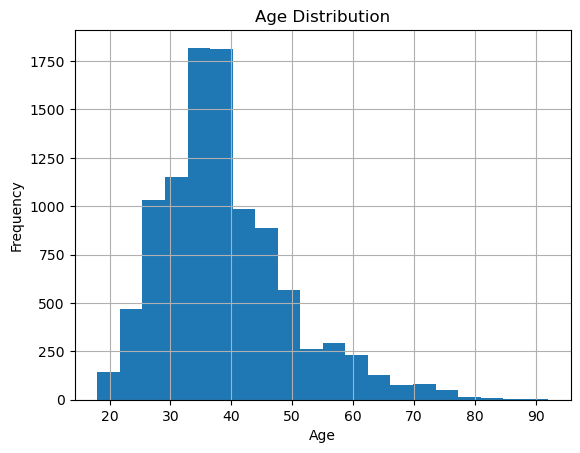

In [11]:
# plot a histogram
df1['Age'].hist(bins=20)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.savefig('agedist.png');

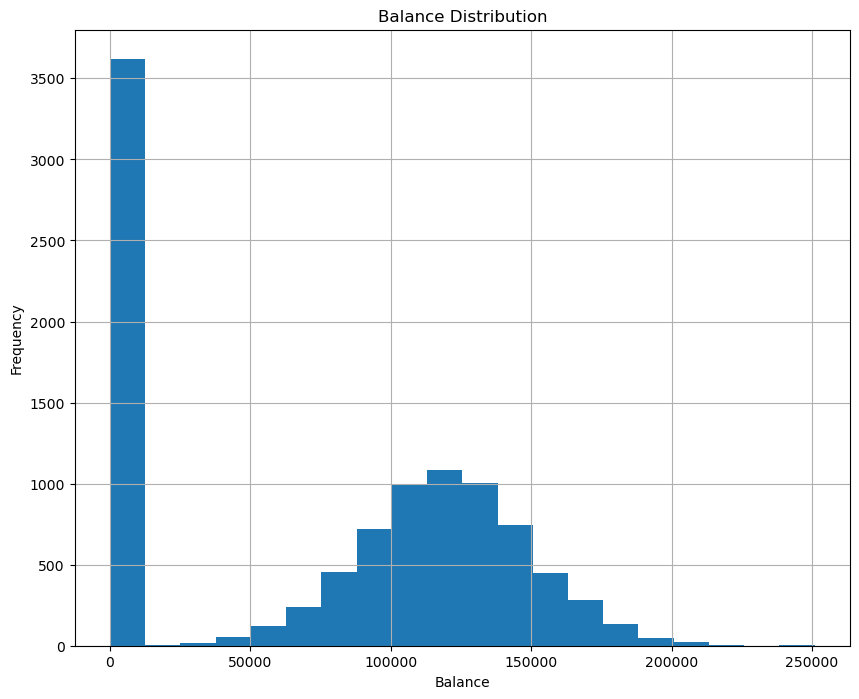

In [12]:
# plot a histogram
plt.figure(figsize=(10,8))
df1['Balance'].hist(bins=20)
plt.ylabel('Frequency')
plt.xlabel('Balance')
plt.title('Balance Distribution')
plt.savefig('accountbalanc.png');

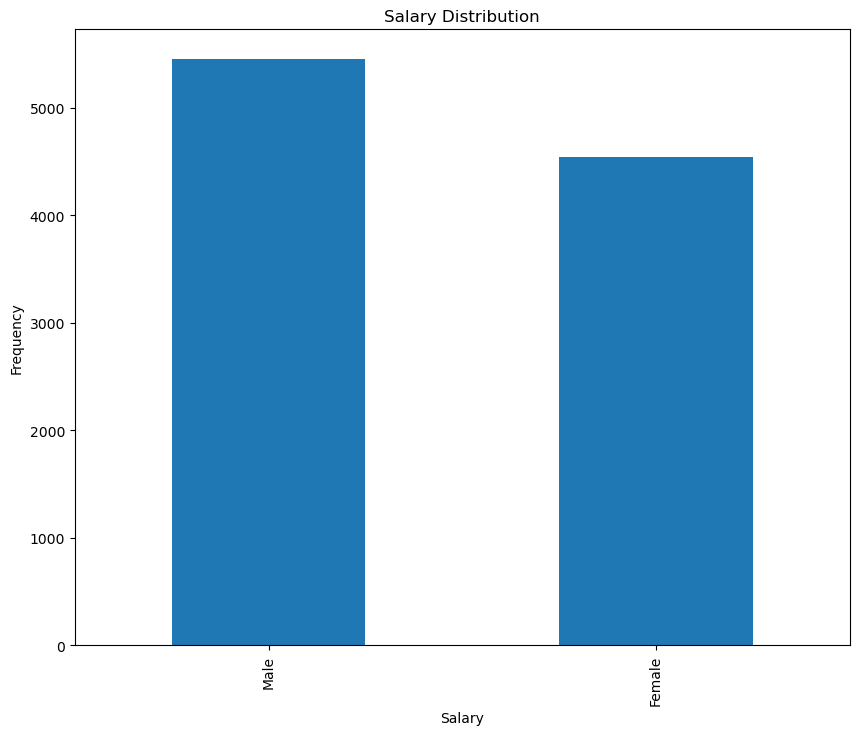

In [13]:
# plot a histogram
plt.figure(figsize=(10,8))
df1['Gender'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.title('Salary Distribution')
plt.savefig('genderdist.png');

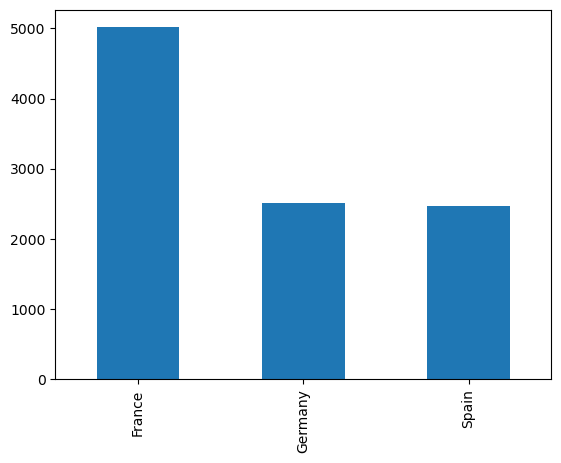

In [14]:
df1['Geography'].value_counts().plot(kind='bar')
plt.savefig('countrycdist.png');

In [15]:
corr=df1.corr()

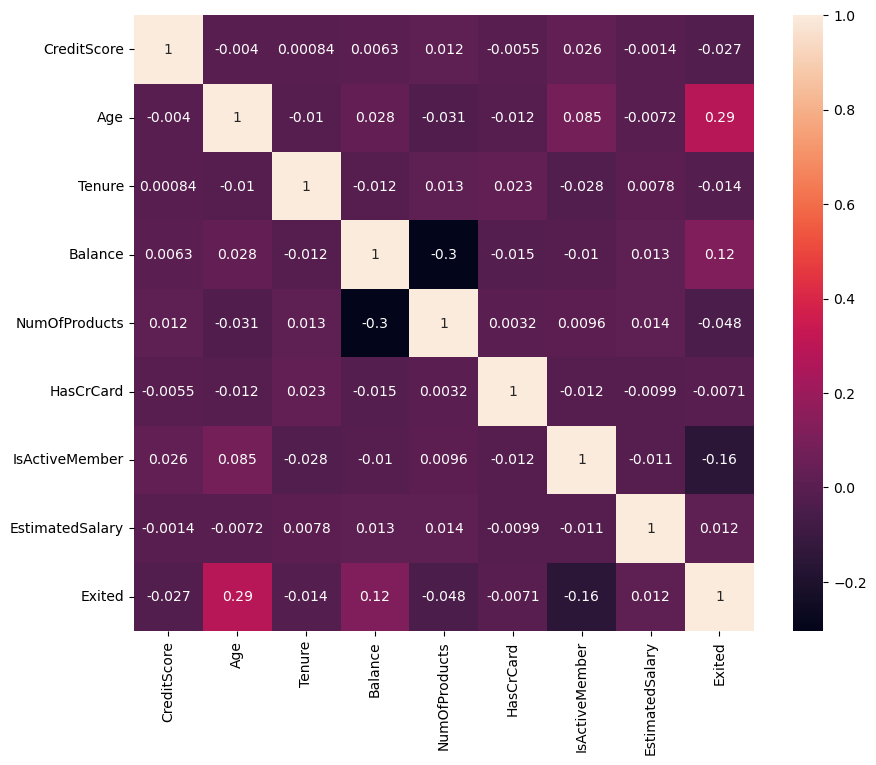

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.savefig('corr.png');

In [17]:
df1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Split

In [18]:
# # standardization
# oh=OneHotEncoder(sparse=False)
# feature_arr=oh.fit_transform(df1)
# feature_arr.shape
# # feature_labels=oh.categories_
# # feature_labels

In [19]:
X=df1.drop(['Exited'], axis=1)
y=df1['Exited']
#oh=OneHotEncoder(use_cat_names=True)
#X=oh.fit_transform(X)
#X=MinMaxScaler2(X)


In [20]:
X.to_numpy()

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train.shape

(6700, 10)

In [22]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape, X_train.shape)

(10612, 10) (6700, 10)


In [23]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape, X_train.shape)

(2788, 10) (6700, 10)


# Build Model

## Baseline

In [24]:
# find majority class
acc=df1['Exited'].value_counts(normalize=True).max()
print('Baseline Accuracy is', acc)
#print(y_train_over.value_counts(normalize=True))


Baseline Accuracy is 0.7963


In [25]:
#help(OneHotEncoder())

## Iterate

In [26]:
# logistic Regression
model_reg= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    MinMaxScaler(),
    LogisticRegression(max_iter=1000)
)
model_reg.fit(X_train, y_train)

model_under= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    MinMaxScaler(),
    LogisticRegression(max_iter=1000)
)
model_under.fit(X_train_under, y_train_under)

model_over= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    MinMaxScaler(),
    LogisticRegression(max_iter=1000)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Geography', 'Gender'],
                               use_cat_names=True)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [27]:
model_reg.named_steps['onehotencoder'].get_feature_names()

['CreditScore',
 'Geography_Germany',
 'Geography_France',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [29]:
# model_regKNN= make_pipeline(
#     OneHotEncoder(sparse=False),
#     MinMaxScaler(),
#     KNNclassifier()
# )
# model_regKNN.fit(X_train, y_train)

# model_underKNN= make_pipeline(
#     OneHotEncoder(sparse=False),
#     MinMaxScaler(),
#     KNNclassifier()
# )
# model_underKNN.fit(X_train_under, y_train_under)

# model_overKNN= make_pipeline(
#     OneHotEncoder(sparse=False),
#     MinMaxScaler(),
#     KNNclassifier()
# )
# model_overKNN.fit(X_train_over, y_train_over)

In [30]:
# #model=ANN(architecture=[8,8,10,8], activations=[np.tanh, np.tanh, np.tanh, np.tanh])
# model_over=LogisticRegression(max_iter=1000)
# model_reg=LogisticRegression(max_iter=1000)
# model_under=LogisticRegression(max_iter=1000)
# #model_reg=KNNclassifier()
# #model_over=KNNclassifier()

In [31]:
# start=time.time()
# #model.fit(X_train, y_train, eta=1e-2, epochs=1e5, show_curve=True)
# model_reg.fit(X_train, y_train)
# model_over.fit(X_train_over, y_train_over)
# model_under.fit(X_train_under, y_train_under)
# finish=time.time()
# duration=(finish-start)/60
# time_taken.append(duration)
# print('Time taken', (finish - start)/60, 'minutes' )

In [32]:
# y_hat=model.predict(X_train)
# accuracy(y_train, y_hat)

In [33]:
y_hat_r=model_reg.predict(X_train)
accuracy(y_train, y_hat_r)

0.8098507462686567

In [34]:
y_hat_u=model_under.predict(X_train)
accuracy(y_train, y_hat_u)

0.7123880597014925

In [35]:
y_hat_o=model_over.predict(X_train)
accuracy(y_train, y_hat_o)

0.7119402985074627

In [36]:
for m in [model_reg, model_under, model_over]:
    
    y_hat=m.predict(X_train)
    acc_train=accuracy(y_train, y_hat)
        
    y_hat=m.predict(X_test)
    acc_test=accuracy(y_test, y_hat)
    recall=recall_score(y_test, y_hat)
    precision=precision_score(y_test, y_hat)
    
    
    

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))
    print('Precision:', precision, '\n', 'Recall:', recall)

Training Accuracy: 0.8099
Test Accuracy: 0.813
Precision: 0.5560344827586207 
 Recall: 0.2006220839813375
Training Accuracy: 0.7124
Test Accuracy: 0.7036
Precision: 0.3663208300079808 
 Recall: 0.713841368584759
Training Accuracy: 0.7119
Test Accuracy: 0.7009
Precision: 0.3624 
 Recall: 0.7045101088646968


In [ ]:
# for m in [model_regKNN, model_underKNN, model_overKNN]:
#     #print(m)
#     y_hat=m.predict(X=X_train,k=3)
#     precision_score(y_test, y_hat)
#     recall_score(y_test, y_hat)
#     acc_train=accuracy(y_train, y_hat)
#     y_hat=m.predict(X=X_test,k=3)
#     acc_test=accuracy(y_test, y_hat)
#     recall=recall_score(y_test, y_hat)
#     precision=precision_score(y_test, y_hsavefig
    
    
    

#     print("Training Accuracy:", round(acc_train, 4))
#     print("Test Accuracy:", round(acc_test, 4))
#     print('Precision:', precision, '\n', 'Recall:', recall)
    

-- no scaling and used onehotencoder  
Training Accuracy: 0.7846  
Test Accuracy: 0.8015  
Training Accuracy: 0.657  
Test Accuracy: 0.6382  
Training Accuracy: 0.6628  
Test Accuracy: 0.6403

In [ ]:
import pickle
# Save the trained model as a pickle string.
pickle.dump(model_under,  open('model_ANN1.pkl', 'wb'))
# Load the pickled model
# model = pickle.load(open('model_ANN.pkl', 'rb'))
# y_hatS=model.predict(X_test,3)
# accuracy(y_test, y_hatS)

# Evaluation

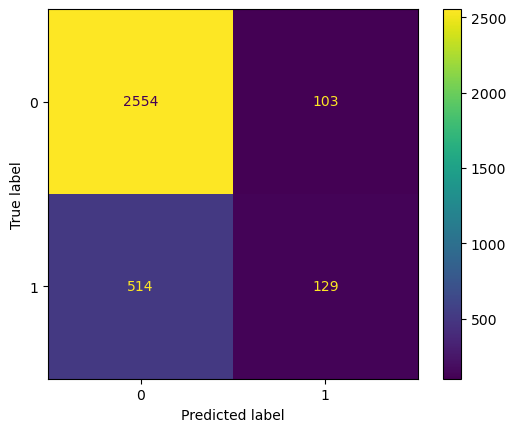

In [37]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test)
plt.savefig('conreg.png');

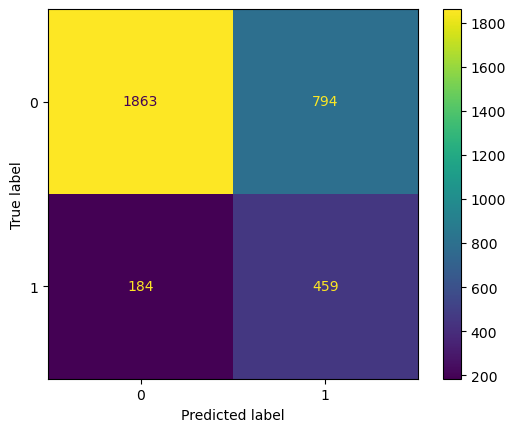

In [38]:
ConfusionMatrixDisplay.from_estimator(model_under, X_test, y_test)
plt.savefig('conunder.png');

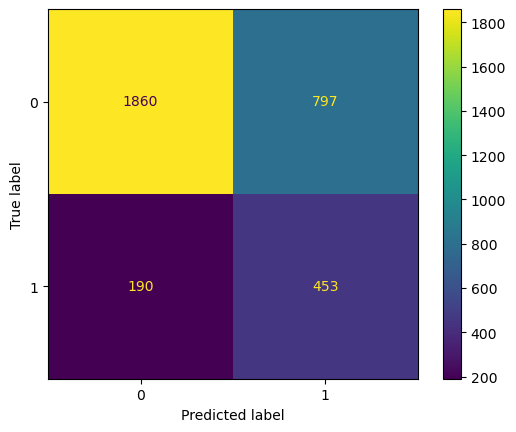

In [39]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test)
plt.savefig('conover.png');

In [ ]:
print(classification_report(y_test, y_hat))

In [ ]:
features = model_under.named_steps['onehotencoder'].get_feature_names()
importances = model_reg.named_steps['logisticregression'].coef_[0]
print(features,)
print( importances)

In [ ]:
features = model_under.named_steps['onehotencoder'].get_feature_names()

importances = model_under.named_steps['logisticregression'].coef_[0]
# print(features)
# print(len(importances[:]))

# Put importances into a Series
feat_imp = pd.Series(importances, index=features).sort_values()


# Plot series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Best Model Feature Importance")
plt.savefig('logisticreg_importances');

In [ ]:
# from sklearn.metrics import PrecisionRecallDisplay
# #ax, fig = plt.subplots()
# display = PrecisionRecallDisplay.from_estimator(
#     model_reg, X_test, y_test, name="LogisticReg"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")
# display = PrecisionRecallDisplay.from_estimator(
#     model_under, X_test, y_test, name="KNNClassifier"
# )
# _= display.ax_.set_title("2-class Precision-Recall curve");

In [ ]:
precision_score(y_test, y_hat)

In [ ]:
recall_score(y_test, y_hat)

In [ ]:
def recall(y, y_hat, c):
    return np.mean(y_hat[y==c]==c)

In [ ]:
def precision(y, y_hat, c):
    return np.mean(y[y_hat==c]==c)

In [ ]:
y_hat[y_train_over==1]


In [ ]:
confusion_matrix(y, y_hat)

In [ ]:
y_hat=model_under.predict(X_test)

In [ ]:
importances = model_under.named_steps['decisiontreeclassifier'].feature_importances_
features=X_train_over.columns

# Put importances into a Series
feat_imp = pd.Series(importances, index=features).sort_values()


# Plot series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");